In [1]:
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


In [2]:
from google.colab import files
uploaded= files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [3]:
elon= pd.read_csv('Elon_musk.csv', encoding= 'latin1')
elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
# Drop 'Unnamed: 0' from dataset
elon.drop(['Unnamed: 0'], inplace= True, axis=1)
elon.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [5]:
elon.isnull().sum()

Text    0
dtype: int64

In [6]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [7]:
# renaming the text columns
elon= elon.rename({'Text':'text'}, axis= 1)
elon.head()

,text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [8]:
elon= [text.strip() for text in elon.text] # remove both the leading and trailing characters
elon= [text for text in elon if text] # remove empty strings, because they are considered in Python as False
elon[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [9]:
len(elon)

1999

In [10]:
elon

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [11]:
# Joining the list into one string/text
elon_text=' '.join(elon)
len(elon_text)

158702

In [12]:
elon_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [13]:
print(elon_text[0:500])

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! 


In [14]:
# Tokenization
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
elon_tokens= word_tokenize(elon_text)

In [16]:
print(elon_tokens[0:500])

['@', 'kunalb11', 'I\x92m', 'an', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'is', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https', ':', '//t.co/zGxJFDzzrM', '@', 'OwenSparks_', '@', 'flcnhvy', '@', 'anonyx10', 'Haha', 'thanks', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@', 'Gi

In [17]:
len(elon_tokens)

28892

In [18]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(elon_tokens)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']


wf_df[0:10]

,word,count
0,co,657
1,https,655
2,the,487
3,to,400
4,is,356
5,of,315
6,spacex,250
7,in,221
8,amp,219
9,it,194


<Axes: title={'center': 'Top word'}, xlabel='word'>

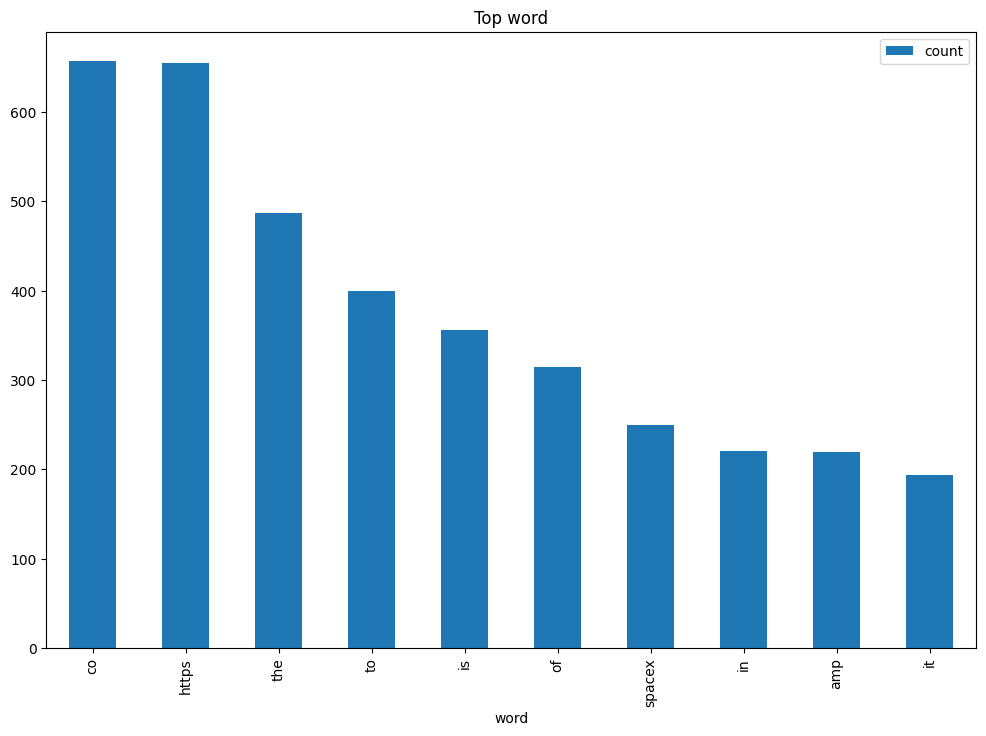

In [19]:
##Visualizing results
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top word')

In [20]:
# Stopwords
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
my_stop_words= stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in elon_tokens if not word in my_stop_words]
print(no_stop_tokens[0:100])

['@', 'kunalb11', 'I\x92m', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!', '!', 'Happy', 'New', 'Year', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', 'Frodo', 'underdoge', ',', 'All', 'thought', 'would', 'fail', ',', 'Himself', '.', 'https', ':', '//t.co/zGxJFDzzrM', '@', 'OwenSparks_', '@', 'flcnhvy', '@', 'anonyx10', 'Haha', 'thanks', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'Indeed', '!', 'Tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'entertaining', 'outcome', 'likely', '@', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', '@', 'kanyewest', 'https', ':']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
len(no_stop_tokens)

23563

In [22]:
# Normalize the data
lower_words= [text.lower() for text in no_stop_tokens]
print(lower_words[0:50])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tried', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestimated', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happy', 'new', 'year', 'ox', '!', 'https', ':', '//t.co/9wfkmyu2oj', 'frodo']


In [23]:
# NLP english language model of spacy library
nlp= spacy.load('en_core_web_sm')

In [24]:
# Lemmas being one of them, but mostly POS, which will follow later
doc= nlp(''. join(lower_words))
print(doc[0:40])

@kunalb11imalien@id_aa_carmackraytracingcyberpunkhdrnext-level.havetried?@joerogan@spotifygreatinterview!@gtera27dogeunderestimated@teslacncongratulationsteslachinaamazingexecutionlastyear.nownexteven!!happynewyearox!https://t.co/9wfkmyu2ojfrodounderdoge,allthoughtwouldfail,himself.https://t.co/zgxjfdzzrm@owensparks_@flcnhvy@anonyx10hahathanks:)@flcnhvy@anonyx10indeed!tweetsdefinitelyrepresentreal-worldtimeallocation.theentertainingoutcomelikely@givedirectlyjustsentjustagreeclubhouse@kanyewesthttps://t.co/3rwe9uhsts@geoffkeighley@unrealengineitsgettingrealboughtdogecoinlilx,toddlerhodler@joshmanmodehedefinitelyissues,sentencingseemsbithigh@freewalletorgthanksfixing@freewalletorgpleaseunlockaccount@astrojordy<u+0001f923><u+0001f923>thistruepowerhahahttps://t.co/fc9uhqsd7o@freewalletorganycryptowalletwontgiveprivatekeysavoidedcosts@freewalletorgyourappsucksrt@spacex:nasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemission!https://t.co/3pwt@ajtourvilleyes@blkmdl3@rat

In [25]:
lemmas= [token.lemma_ for token in doc]
print(lemmas[0:40])

["@kunalb11i\x92malien@id_aa_carmackraytracingcyberpunkhdrnext-level.havetried?@joerogan@spotifygreatinterview!@gtera27dogeunderestimated@teslacncongratulationsteslachinaamazingexecutionlastyear.nownexteven!!happynewyearox!https://t.co/9wfkmyu2ojfrodounderdoge,allthoughtwouldfail,himself.https://t.co/zgxjfdzzrm@owensparks_@flcnhvy@anonyx10hahathanks:)@flcnhvy@anonyx10indeed!tweetsdefinitelyrepresentreal-worldtimeallocation.theentertainingoutcomelikely@givedirectlyjustsentjustagreeclubhouse@kanyewesthttps://t.co/3rwe9uhsts@geoffkeighley@unrealengineit\x92sgettingrealboughtdogecoinlilx,toddlerhodler@joshmanmodehedefinitelyissues,sentencingseemsbithigh@freewalletorgthanksfixing@freewalletorgpleaseunlockaccount@astrojordy<u+0001f923><u+0001f923>thistruepowerhahahttps://t.co/fc9uhqsd7o@freewalletorganycryptowalletwon\x92tgiveprivatekeysavoidedcosts@freewalletorgyourappsucksrt@spacex:nasaselectedfalconheavylaunchfirsttwoelementslunargatewaytogetheronemission!https://t.co/3pwt@ajtourvilleyes@

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(lemmas)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df1 = pd.DataFrame(words_freq)
wf_df1.columns = ['word', 'count']


wf_df1[0:10]

,word,count
0,co,653
1,amp,219
2,spacex,129
3,https,104
4,erdayastronaut,93
5,ppathole,88
6,0001f923,77
7,flcnhvy,71
8,teslaownerssv,44
9,rationaletienne,32


<Axes: title={'center': 'Top Lemmas'}, xlabel='word'>

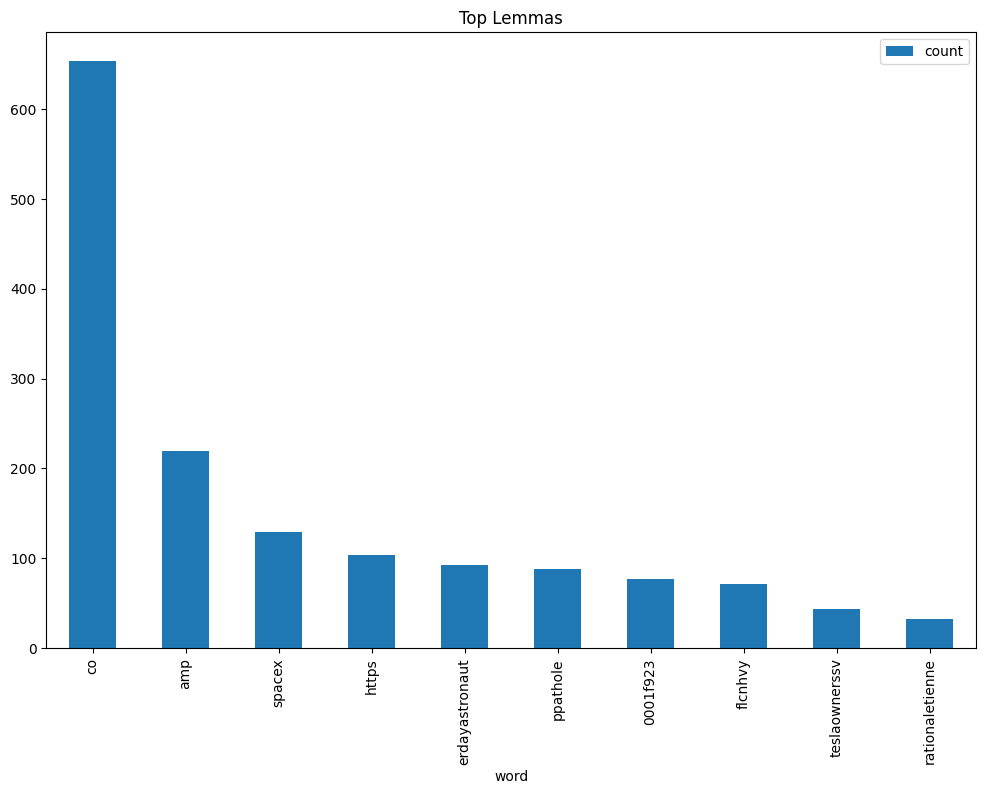

In [27]:
##Visualizing results
wf_df1[0:10].plot.bar(x='word', figsize=(12,8), title='Top Lemmas')